## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\JL\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your hyper-parameters
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 10
BATCH_SIZE = 2048
MOMENTUM = 0.95

In [8]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau
"""
Set model checkpoint callbacks
Write your training loop and show the results
"""
reduce_lr = ReduceLROnPlateau(factor=0.8, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=2, 
                              verbose=1)

In [9]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[reduce_lr]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 21s 423us/step - loss: 0.3288 - acc: 0.9284 - val_loss: 1.6178 - val_acc: 0.5148
Epoch 42/50
50000/50000 [==============================] - 20s 405us/step - loss: 0.3255 - acc: 0.9294 - val_loss: 1.6271 - val_acc: 0.5176

Epoch 00042: ReduceLROnPlateau reducing learning rate to 2.8147498960606756e-05.
Epoch 43/50
50000/50000 [==============================] - 20s 394us/step - loss: 0.3220 - acc: 0.9303 - val_loss: 1.6308 - val_acc: 0.5188
Epoch 44/50
50000/50000 [==============================] - 24s 478us/step - loss: 0.3184 - acc: 0.9326 - val_loss: 1.6396 - val_acc: 0.5161

Epoch 00044: ReduceLROnPlateau reducing learning rate to 2.25179988774471e-05.
Epoch 45/50
50000/50000 [==============================] - 20s 402us/step - loss: 0.3149 - acc: 0.9341 - val_loss: 1.6375 - val_acc: 0.5145
Epoch 46/50
50000/50000 [==============================] - 25s 505us/step - loss: 0.3130 - acc: 0.9348 - val_loss: 1.6339 - val_acc: 0.5144

Epoch 000

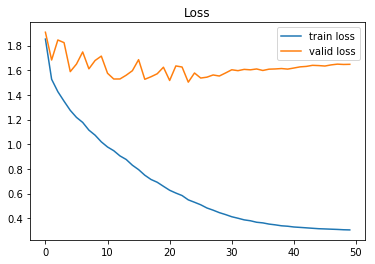

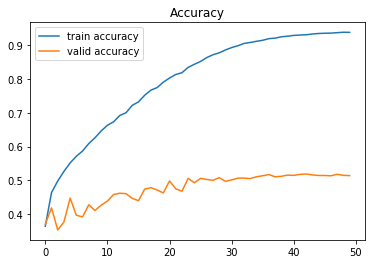

In [10]:
# 繪製結果
"""
plot the results
"""
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()